<h2 align=center> Facial Expression Recognition with Keras</h2>

### Task 1: Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

#keras librarie
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


### Task 2: Plot Sample Image

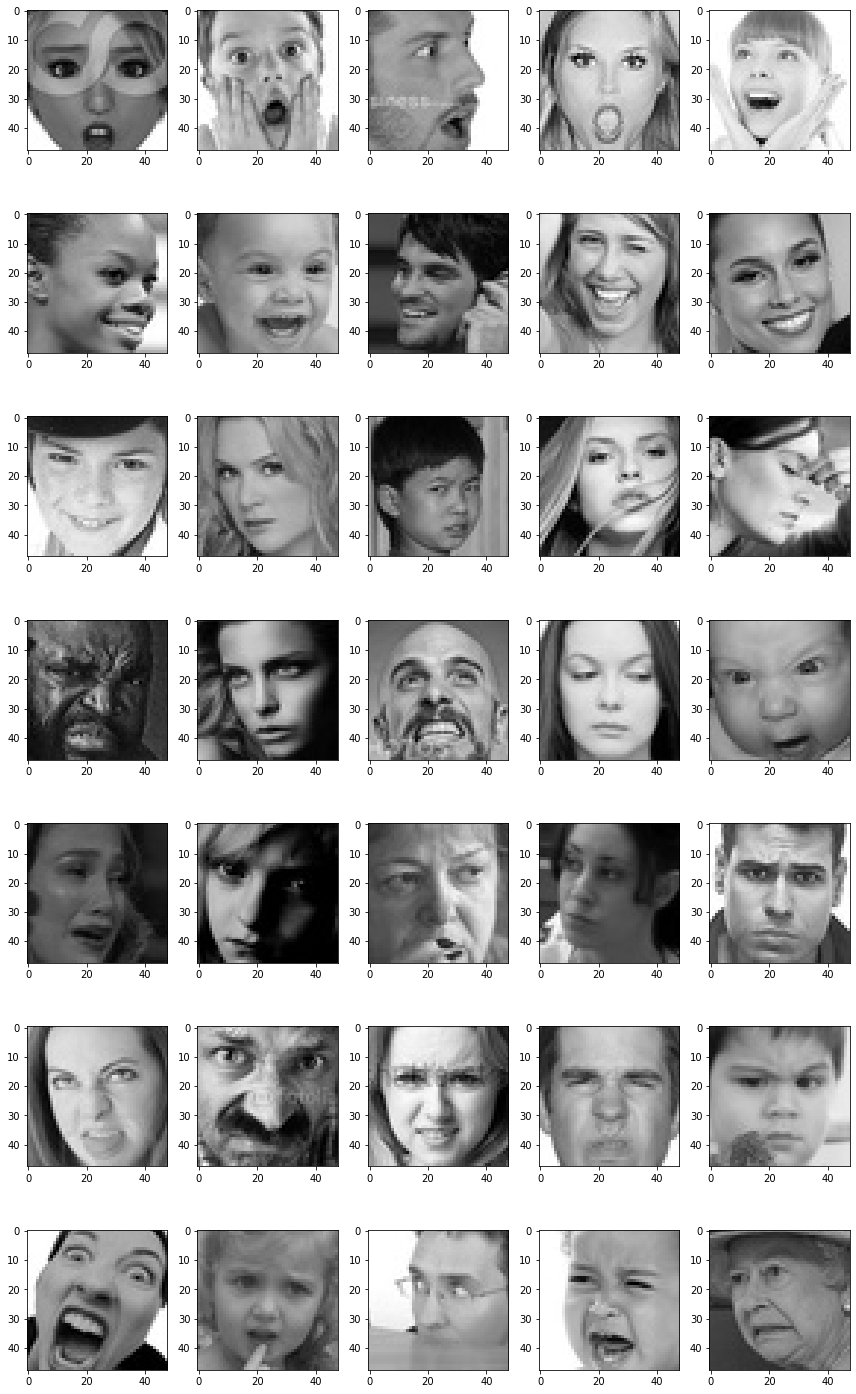

In [2]:
#utility function to get image (get a spread of distribution of images)

utils.datasets.fer.plot_example_images(plt).show() #fer - facial recognition

In [3]:
#to get an understanding of images over the classes and labels - class balance

for expression in os.listdir('train/'): # expression is subfolders in train folder 
    print(str(len(os.listdir('train/'+ expression)))+ ' ' + expression + ' '+ 'images')
    #print number of images followed by its label string
    # x- images, y-expressions/labels


3171 surprise images
7215 happy images
4965 neutral images
3995 angry images
4830 sad images
436 disgust images
4097 fear images


### Task 3: Generate Training and Validation Batches

In [4]:
# minibatch GD is used - fized number of samples that are used for a single step of GD 
#(series of steps in single epoch)
#mean gradient to update the weigths

#define parameters for DataLoader

img_size= 48 #as image size is 48x48
batch_size=64 #to speed up 

#data generator - used for real time data feeding to Keras model to avoid memory space usage
#for data augmentation - randomly flip images along horizontal axis

datagen_train = ImageDataGenerator(horizontal_flip=True)

# To load images from training directory
train_generator=datagen_train.flow_from_directory('train/',
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True) 

#take images from batches of images that we specify, with ttaget size of images, in color mode
# batch size and converting all classes by one hot encoding and shiffle the data as well.

datagen_validation = ImageDataGenerator(horizontal_flip=True)

# To load images from  directory
validation_generator=datagen_validation.flow_from_directory('test/',
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True) 

#take images from batches of images that we specify, with ttaget size of images, in color mode
# batch size and converting all classes by one hot encoding and shiffle the data as well.


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

![](model.png)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [6]:
model =Sequential() #intialize model

model.add(Conv2D(64,(3,3),padding='SAME',input_shape=(48,48,1))) #1st conv layer, with 64 filters each of 3x3 
#padding SAME so we don't lose informatgion about iamge and insert inout shape as well.
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # to prevent overfit

model.add(Conv2D(128,(5,5),padding='SAME')) #2 conv layer, with 128 filters each of  5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # to prevent overfit


model.add(Conv2D(512,(3,3),padding='SAME')) #3 conv layer, with 3x3 filters each of  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # to prevent overfit

model.add(Conv2D(512,(3,3),padding='SAME')) #2 conv layer, with 3x3 filters each of  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # to prevent overfit

model.add(Flatten())

model.add(Dense(256)) # first fully connected layer
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) # to prevent overfit

model.add(Dense(512)) # seocnd fully connected layer
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) # to prevent overfit

model.add(Dense(7,activation='softmax'))

optimizer=Adam(lr=0.0005)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

### Task 6: Train and Evaluate Model

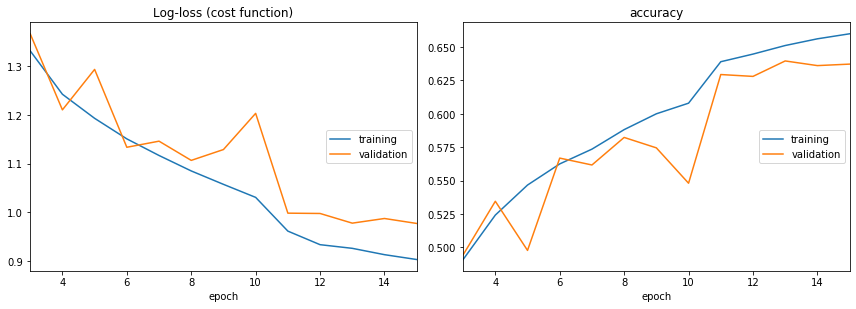

Log-loss (cost function):
training   (min:    0.903, max:    1.806, cur:    0.903)
validation (min:    0.977, max:    1.531, cur:    0.977)

accuracy:
training   (min:    0.306, max:    0.660, cur:    0.660)
validation (min:    0.402, max:    0.640, cur:    0.637)

Epoch 00015: saving model to model_weight.h5
448/448 [==============================] - 27s 61ms/step - loss: 0.9032 - accuracy: 0.6600 - val_loss: 0.9774 - val_accuracy: 0.6373


In [13]:
from livelossplot import PlotLossesTensorFlowKeras
#define model parameters
epochs= 15 #based on learning rate and model 
steps_per_epoch=train_generator.n//train_generator.batch_size #n number of train generators

validation_steps=validation_generator.n//validation_generator.batch_size #batch size also

#Define some callbacks
 #weights with highest accuracy are saved to disk
checkpoint=ModelCheckpoint('model_weight.h5',monitor='val_accuracy',
                           save_weights_only=True, mode='max',
                           verbose=1) #ModelCheckpoint for maximum accuracyfrom keras

 #reduce learning rate when we don't see improvement in the validation error after certian epoch
 #factor - reduce lr by factor, patience-perform reduction of lr when val_loss doesnt improve for 2 epochs,
 # min_lr=how low lr can get in the limit
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor =0.1, 
                            patience=2,min_lr=0.0000, model='auto')

#live loss plot not to lose memory and not use tensorboard
callbacks=[PlotLossesTensorFlowKeras(),checkpoint,reduce_lr]

history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks

) #can improve the accuracy (here it is around 60-65%) by training more data and introducing data augmentation techniques

### Task 7: Represent Model as JSON String

In [15]:
model_json=model.to_json()
with open ('model.json','w') as json_file:
    json_file.write(model_json)

#main.py - creating flask app for model predictions
#camera.py - camera class get image stram from video source disk and detects from opencv and draw bounding boxes around them

#camera - once it detects face and gets images from video stream, it also sends images to NN and guess predictions from NN and sends it back to main.py 
#that final serve predictions to web interface through flask

### Create output Class to model predictions

In [ ]:
# open atom
#